Q.2. Solve the following matrix using simultaneous equations in python
        6x+2y-5z=13
        3x+3y-2z=13
        7x+5y-3z=26

Converting the above equations to a matrix

In [1]:
import numpy as np

In [14]:
A = np.array([[6,2,-5],[3,3,-2],[7,5,-3]])
print(A)

[[ 6  2 -5]
 [ 3  3 -2]
 [ 7  5 -3]]


In [15]:
B = np.array([[13],[13],[26]])
print(B)

[[13]
 [13]
 [26]]


Now the above equations can be written as, A.X = B, where X is matrix of x,y and z

X = A^-1 . B -> X = dot product of A inverse and B

In [16]:
Ainv = np.linalg.pinv(A)
print(Ainv)

[[ 0.03846154 -0.73076923  0.42307692]
 [-0.19230769  0.65384615 -0.11538462]
 [-0.23076923 -0.61538462  0.46153846]]


In [17]:
X = np.dot(Ainv,B)
print(X)

[[2.]
 [3.]
 [1.]]


Hence the values of x,y and z are 2,3 and 1 respectively

Q.3. The following dataset of size n = 63 provides total payment (in thousands) for all the claims of Swedish Kronor for geographical zones in Sweden. The variables are y = total payment in thousands and x = number of claims.

Find the intercept, coefficient value and error term for this regression problem.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [3]:
data = pd.read_excel('data.xls')

In [4]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values

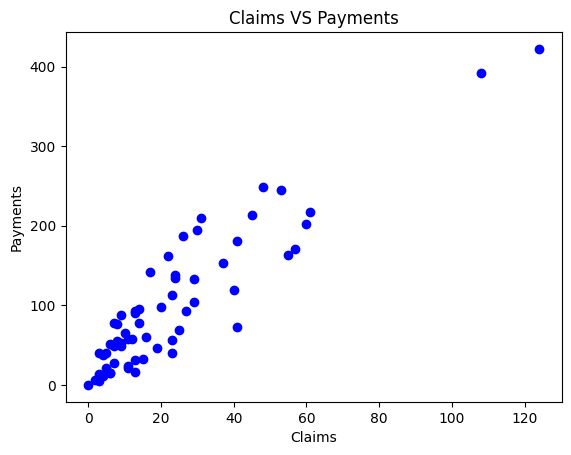

In [5]:
plt.scatter(X, Y, color='blue')
plt.title('Claims VS Payments')
plt.xlabel('Claims')
plt.ylabel('Payments')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/5, random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

In [8]:
print('Coefficient = ', model.coef_)
print('Intercept = ', model.intercept_)

Coefficient =  [3.42923429]
Intercept =  16.75023759857541


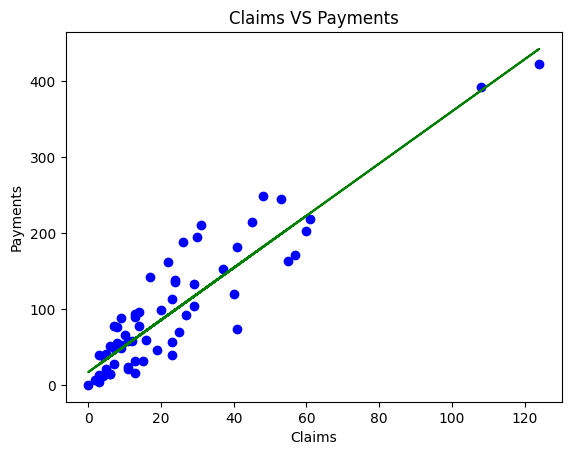

In [9]:
# Visualize the fitted regression line

plt.scatter(X, Y, color='blue')
plt.plot(X_train, model.predict(X_train), color='green')
plt.title('Claims VS Payments')
plt.xlabel('Claims')
plt.ylabel('Payments')
plt.show()

In [10]:
Y_predict = model.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
import math
mse = mean_squared_error(Y_test, Y_predict)
rmse = math.sqrt(mse)
print("Mean squared error = ", mse)
print("Root Mean squared error = ", rmse)
print('Variance score = ', r2_score(Y_test, Y_predict))

Mean squared error =  875.0434234424163
Root Mean squared error =  29.581132896534175
Variance score =  0.8950819493918402


Thus the linear equation is,
Y = 3.42923429(X) + 16.75023759857541
where,

Coefficient = 3.42923429
Intercept = 16.75023759857541

Mean Squared Error = 875.0434234424163
Root Mean Squared Error = 29.581132896534175
Variance or R2 score = 0.8950819493918402


Coefficient is the number of times the dependant variable Y increases for 1 % increase in the independant variable X. 
Now for the given the example if the number of claims increases by 1 then the total payment will increase by 3.42923429(in thousands)

Intercept is the value of dependant variable Y when the independant varibale X is 0. 
Now for the given example if the number of claims is 0 then the total payment is 16.75023759857541(in thousands).

Error term is the difference between the model predicted value and the actual value. So if the error term is less then it means our model can predict the values properly in most of the cases. In the given example the mean squared error is 875.04 and the square root of it is 29.5. This means there is a possibility of difference of 29.5(in thousands) between the actual payment and the model estimated payment.

Variance or model score (R2) is the score of the model. If this score is high then it means the model is predicting good.